In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.awa_interface import AWAInterface

# import data from csv file
import pandas as pd
variable_file = "plugins/environments/awa_variables.csv"
observable_file = "plugins/environments/awa_observables.csv"
variable_info = pd.read_csv(variable_file).set_index("NAME")
observable_info = pd.read_csv(observable_file).set_index("NAME").T

variables = variable_info[["MIN","MAX"]].T.to_dict()
observables = list(observable_info.keys())

for name in variables:
    variables[name] = [variables[name]["MIN"], variables[name]["MAX"]]
observables

env = AWAEnvironment(variable_file, observable_file, interface=AWAInterface(), target_charge=1.0)

In [2]:
meas = env.get_screen_measurement("13ARV1",["AWAVXI11ICT:Ch1"])

CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 14:37:25.306984467
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 14:37:25.307182192
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 14:37:25.307322045
................................................................

In [3]:
meas

{'AWAVXI11ICT:Ch1': 1.0241894495700797e-09,
 '13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:image1:ArraySize0_RBV': 1920,
 '13ARV1:Cx': 304.4604526004676,
 '13ARV1:Cy': 365.1540843646186,
 '13ARV1:Sx': 44.04387081387251,
 '13ARV1:Sy': 40.899682293818486,
 '13ARV1:penalty': -126.33225856865025}

In [4]:
meas = env.get_observables(["13ARV1:Sx"])

In [5]:
meas

{'AWAVXI11ICT:Ch1': 9.673633914558195e-10,
 '13ARV1:image1:ArraySize1_RBV': 1200.0,
 '13ARV1:image1:ArraySize0_RBV': 1920.0,
 '13ARV1:Cx': 299.48124761425004,
 '13ARV1:Cy': 360.62968210511264,
 '13ARV1:Sx': 43.854519667334046,
 '13ARV1:Sy': 41.38772092160603,
 '13ARV1:penalty': -130.41620471051402,
 'AWAVXI11ICT:Ch1_std': 3.688753716306149e-11,
 '13ARV1:image1:ArraySize1_RBV_std': 0.0,
 '13ARV1:image1:ArraySize0_RBV_std': 0.0,
 '13ARV1:Cx_std': 3.496097162073799,
 '13ARV1:Cy_std': 1.0279952589519192,
 '13ARV1:Sx_std': 0.2975718100104892,
 '13ARV1:Sy_std': 0.1250162395311504,
 '13ARV1:penalty_std': 1.3138514796145202}

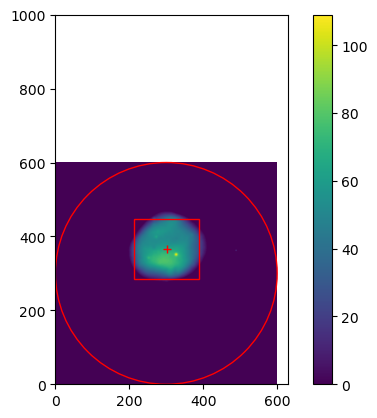

In [6]:
meas = env.get_screen_measurement("13ARV1",['13ARV1:Sx', 'AWAVXI11ICT:Ch1'], visualize=True)

In [7]:
meas

{'13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:image1:ArraySize0_RBV': 1920,
 '13ARV1:Sx': 43.764311284328045,
 'AWAVXI11ICT:Ch1': 9.16064253748789e-10,
 '13ARV1:Cx': 301.40990890142496,
 '13ARV1:Cy': 366.450972632588,
 '13ARV1:Sy': 40.94864862697984,
 '13ARV1:penalty': -127.03390055162086}